# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Comparing Fandango's rating system before and after the analysis

To see if there has been any change in Fandango's rating system, se sill compare the system's characteristics previous and after the analysis.

* Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango).

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
import pandas as pd

In [2]:
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before.sample(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
52,The Age of Adaline (2015),54,68,51,7.4,7.3,4.5,4.2,2.70,3.40,...,3.65,2.5,3.5,2.5,3.5,3.5,100,45510,3325,0.3
120,The Wolfpack (2015),84,73,75,7.0,7.1,3.5,3.4,4.20,3.65,...,3.55,4.0,3.5,4.0,3.5,3.5,8,1488,66,0.1
60,Unfinished Business (2015),11,27,32,3.8,5.4,3.5,3.2,0.55,1.35,...,2.70,0.5,1.5,1.5,2.0,2.5,39,14346,821,0.3


In [4]:
after.sample(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
52,Fences,2016,79,7.3,93,78,4.0,3.95,3.65,4.65,3.90,4.0,3.5,4.5,4.0
189,The Nice Guys,2016,70,7.4,92,79,3.5,3.50,3.70,4.60,3.95,3.5,3.5,4.5,4.0
96,Lion,2016,69,8.1,86,92,4.0,3.45,4.05,4.30,4.60,3.5,4.0,4.5,4.5


In [5]:
before.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [6]:
# Select columns that offer information about Fandango
fd_columns = ['FILM', 'Fandango_Stars', 
              'Fandango_Ratingvalue', 'Fandango_votes', 
              'Fandango_Difference']
fd_before = before[fd_columns]

In [7]:
after.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [8]:
fd_after = after[['movie', 'year','fandango']]

Since we want to compare Fandango's rating system before and after the analysis, the population of interest consists of all the movies stored in the website.

From Hickey's article and from the README.md of [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:

* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

The sampling conditions for the other sample were (as it can be read in the README.md of [the data set's repository](https://github.com/mircealex/Movie_ratings_2016_17)):

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

Both samples are not random. They are subject to temporal trends and they're unlikely to be representative of our population of interest.

## Changing the goal

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

Instead of trying to see if there has been any change in Fandango's rating system, we will see the difference between Fandango's rating for popular movies in 2015 and in 2016.

## Isolating the data

We will be working only with popular movies. We will use Hickey's definition of "popular" and choose movies with **at least 30 fan ratings**.

In [9]:
sum(fd_before['Fandango_votes']<30)

0

We want movies only in 2015 or 2016.

In [10]:
fd_before['Year'] = fd_before['FILM'].str[-5:-1]
fd_before.sample(3)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
42,About Elly (2015),4.0,3.6,43,0.4,2015
24,Trainwreck (2015),4.5,4.1,8381,0.4,2015
101,The Gallows (2015),3.0,2.9,1896,0.1,2015


In [11]:
fd_15 = fd_before[fd_before['Year'] == '2015'].copy()

In [12]:
fd_2016 = fd_after[fd_after['year'] == 2016].copy()

## Distribution shape in 2015 and 2016

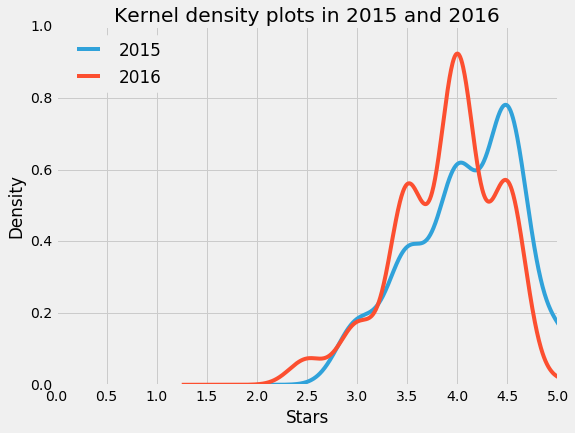

In [13]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fd_15['Fandango_Stars'].plot.kde(label='2015', legend=True, 
                                figsize=(8,6))
fd_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title('Kernel density plots in 2015 and 2016')
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))

plt.show()

We can see that :
* Both plots are left skewed.
* The 2016 plot is lightly shifted to the left.

The left shift of the 2016 distribution shows that ratings were slightly lower in 2016 compared to 2015.

## Frequency distribution in 2015 and 2016

In [14]:
# For 2015
fd_15['Fandango_Stars'].value_counts(normalize=True).sort_index() *100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
# For 2016
fd_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, the percentages of high ratings (4.5 and 5) has decreased. Less than 1% of movies had 5 stars in 2016.

In 2015, the minimum rating was 3.0, however in 2016 it became 2.5.

For ratings 3.5 and 4.0, the percentage increased in 2016 compared to 2015.

## Direction of change

Let's compute the mean, median and mode for each distribution.

In [19]:
mean_15 = fd_15['Fandango_Stars'].mean()
mean_16 = fd_2016['fandango'].mean()

median_15 = fd_15['Fandango_Stars'].median()
median_16 = fd_2016['fandango'].median()

mode_15 = fd_15['Fandango_Stars'].mode()[0]
mode_16 = fd_2016['fandango'].mode()[0]

compare = pd.DataFrame()
compare['2015'] = [mean_15, median_15, mode_15]
compare['2016'] = [mean_16, median_16, mode_16]
compare.index = ['mean', 'median', 'mode']

In [20]:
compare

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


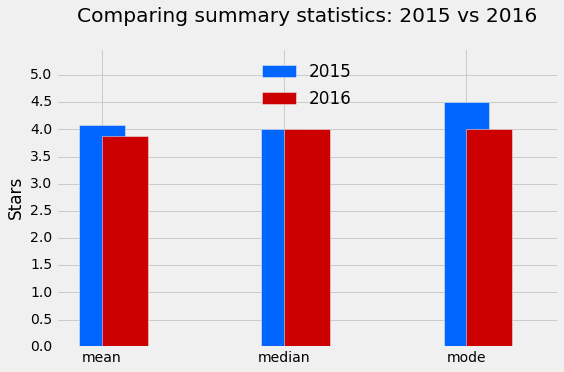

In [36]:
plt.style.use('fivethirtyeight')
compare['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
compare['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating dropped by 0.2 in 2016. While the median is the same for both distributions, the mode is lower in 2016 by 0.5.